what is sequential model and what are its alternatives and their uses?
ans:
### Sequential Model

The Sequential model in Keras is a linear stack of layers. It is ideal for creating simple neural networks where layers are arranged in a sequence, one after the other. Each layer has exactly one input tensor and one output tensor.

**Example:**

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
```

**Use Cases:**

- Suitable for simple, feed-forward neural networks.
- Commonly used for straightforward tasks such as image classification, regression, and basic NLP tasks where the data flows in one direction (from input to output).

### Alternatives to Sequential Model

1. **Functional API**
2. **Model Subclassing**

#### 1. Functional API

The Functional API is more flexible than the Sequential model. It allows for the creation of complex models, such as multi-input, multi-output models, shared layers, and models with non-linear topology (e.g., residual connections).

**Example:**

```python
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

inputs = Input(shape=(784,))
x = Dense(32, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
```

**Use Cases:**

- Useful for models with multiple inputs and outputs.
- Enables the creation of complex architectures like Siamese networks, residual networks (ResNet), and attention mechanisms.
- Allows the reuse of layers by sharing them across different inputs.

#### 2. Model Subclassing

Model subclassing provides full control over the model architecture by allowing the creation of custom models by subclassing the `tf.keras.Model` class. It is the most flexible way to create models but requires more code and a deeper understanding of the Keras framework.

**Example:**

```python
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = Dense(32, activation='relu')
        self.dense2 = Dense(64, activation='relu')
        self.dense3 = Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

model = MyModel()
```

**Use Cases:**

- Necessary for models with dynamic architectures that can't be defined using the Sequential model or Functional API.
- Useful for implementing custom training loops and complex computations within the model.
- Ideal for research and development when experimenting with novel model architectures.

### Summary

- **Sequential Model**: Best for simple, feed-forward neural networks where layers are added sequentially.
- **Functional API**: Offers flexibility to build complex models with multiple inputs and outputs, shared layers, and non-linear topologies.
- **Model Subclassing**: Provides the highest level of flexibility, allowing for custom and dynamic model architectures and is ideal for advanced research and development tasks.

which is better for OCR and why not others?

When considering Optical Character Recognition (OCR) tasks, the choice between Sequential models, the Functional API, and Model Subclassing in Keras depends on the complexity and requirements of the OCR system being developed. Here's an analysis of which approach is generally better suited for OCR and why:

### Functional API

**Why the Functional API is often the best choice for OCR:**

1. **Flexibility in Architecture:**
   - OCR systems often require complex architectures, such as Convolutional Neural Networks (CNNs) for feature extraction followed by Recurrent Neural Networks (RNNs) for sequence modeling. The Functional API allows for the design of such complex architectures easily.
   - OCR tasks may also benefit from attention mechanisms, which can be more naturally implemented using the Functional API.

2. **Multiple Inputs and Outputs:**
   - OCR systems might need to handle multiple input sources (e.g., images and bounding box coordinates) or produce multiple outputs (e.g., character sequences and confidence scores). The Functional API supports such scenarios efficiently.
   
3. **Layer Sharing and Reuse:**
   - Layers, such as feature extractors, can be shared across different parts of the network, which is straightforward with the Functional API. This can be crucial for models that process parts of an image separately but use shared weights.

4. **Non-linear Topologies:**
   - OCR models may require non-linear data flows, such as residual connections or skip connections, which are cumbersome to implement with the Sequential model but are straightforward with the Functional API.

**Example:**
```python
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, LSTM

inputs = Input(shape=(32, 32, 1))
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = LSTM(128, return_sequences=True)(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
```

### Why Not the Others?

#### Sequential Model

- **Limitations:**
  - **Linear Topology Only:** Sequential models are limited to a linear stack of layers, which is insufficient for the complex, multi-component nature of OCR systems that often require parallel or interconnected layers.
  - **Single Input/Output:** They are not designed to handle multiple inputs and outputs gracefully, which is often needed in OCR tasks.

- **Use Case:** 
  - Can be used for very simple OCR tasks where a straightforward convolutional and dense layer stack suffices, but this is rarely the case in modern OCR applications.

#### Model Subclassing

- **Complexity:**
  - **Code Overhead:** While subclassing provides maximum flexibility, it requires more boilerplate code and a deeper understanding of the framework, which can be overkill for many OCR tasks.
  - **Custom Training Loops:** Often necessitates custom training loops and more manual management of layers and operations, which can increase development time and complexity.

- **Use Case:**
  - Ideal for highly customized or experimental OCR models where standard layers and operations do not suffice. It is also useful when implementing novel research ideas that require dynamic changes during the forward pass.

### Summary

For most OCR tasks, the **Functional API** in Keras strikes the best balance between flexibility and ease of use. It allows for the construction of complex models needed for OCR, such as those incorporating CNNs, RNNs, and attention mechanisms, while maintaining a straightforward and intuitive code structure. The **Sequential Model** is too limited for the typical complexity of OCR systems, and **Model Subclassing**, while very flexible, often introduces unnecessary complexity for standard OCR tasks.

In [1]:
#import necessary modules
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np


In [2]:
# Load and process the data
(x_train,y_train), (x_test, y_test)=mnist.load_data()


(28, 28)


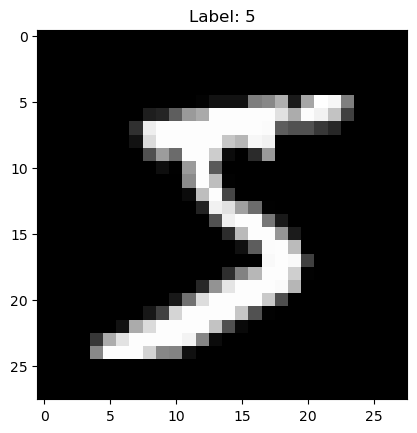

In [3]:
print(x_train[0].shape)
import matplotlib.pyplot as plt
plt.imshow(x_train[0].squeeze(),cmap='gray')
plt.title(f'Label: {y_train[0]}')
#plt.axis('off')  # Turn off axis labels
plt.show()

In [4]:
#Normalize the images to the range of [0,1]
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [5]:
'''since the images in the MNIST are grayscale with the shape of 28X28, we need to reshape it to include the channel 
as the deep learing model uses the images of dimension (height, width, channel)'''
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)

In [6]:
#One-shot encode the labels
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

step 3: Build the Model using Functional API

In [7]:
#define the inputs
inputs=Input(shape=(28,28,1))

#First Convoluitonal block
x=Conv2D(32,kernel_size=(3,3),activation='relu')(inputs)
x=MaxPooling2D(pool_size=(2,2))(x)


In the code snippet you provided, the operations define the input layer and the first convolutional block of a Convolutional Neural Network (CNN) using the Keras Functional API. Let’s break down each part of the code:

Code Explanation
python
Copy code
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D

# Define the inputs
inputs = Input(shape=(28, 28, 1))

# First Convolutional block
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
Detailed Breakdown
1. Define the Inputs
python
Copy code
inputs = Input(shape=(28, 28, 1))
Input(shape=(28, 28, 1)): This defines the input layer of the model.
shape=(28, 28, 1): The shape parameter specifies the dimensions of the input data.
28, 28: These dimensions correspond to the height and width of the MNIST images.
1: This dimension corresponds to the single color channel, as MNIST images are grayscale.
2. First Convolutional Block
python
Copy code
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
Conv2D(32, kernel_size=(3, 3), activation='relu'): This creates a convolutional layer.
32: The number of filters (also known as kernels) to be used in this layer. Each filter will produce a separate output feature map.
kernel_size=(3, 3): The dimensions of the filters (3x3 pixels). This means that each filter will look at a 3x3 patch of the input image.
activation='relu': The ReLU (Rectified Linear Unit) activation function is applied to introduce non-linearity into the model.
(inputs): This layer takes the inputs tensor as its input.
python
Copy code
x = MaxPooling2D(pool_size=(2, 2))(x)
MaxPooling2D(pool_size=(2, 2)): This creates a max-pooling layer.
pool_size=(2, 2): The dimensions of the pooling window (2x2 pixels). This means that each 2x2 region in the feature map will be downsampled to a single value (the maximum value in that region).
(x): This layer takes the output tensor x from the previous convolutional layer as its input.
What These Layers Do
Input Layer: Defines the shape and structure of the input data.
Conv2D Layer:
Applies 32 filters to the input image, where each filter convolves over the image to produce a set of feature maps.
The 3x3 filters detect various features in the input image such as edges, textures, etc.
The ReLU activation function introduces non-linearity, which allows the network to learn more complex patterns.
MaxPooling2D Layer:
Reduces the spatial dimensions (height and width) of the feature maps by taking the maximum value in each 2x2 window.
This downsampling helps reduce the computational complexity and also makes the feature detection more robust to small translations in the input.
Summary
The provided code defines the input layer and the first convolutional block of a CNN. The input layer specifies that the input images are 28x28 pixels with a single channel. The convolutional layer applies 32 filters of size 3x3 to the input image and then applies the ReLU activation function. The max-pooling layer then reduces the spatial dimensions of the feature maps by taking the maximum value in each 2x2 window, which helps in reducing the complexity and preventing overfitting.

In [8]:
#second convolutional block
x=Conv2D(64,kernel_size=(3,3),activation='relu')(x)
x=MaxPooling2D(pool_size=(2,2))(x)

In [9]:
#flatten the output and add the fully connected layers
x=Flatten()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.5)(x) #Droupout for regulation

In the given code, the operations flatten the output from the convolutional layers and then add fully connected (dense) layers to the model. Let's break down each step:

### Code Explanation

```python
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Flatten the output
x = Flatten()(x)

# Add a fully connected layer
x = Dense(128, activation='relu')(x)

# Add dropout for regularization
x = Dropout(0.5)(x)
```

### Detailed Breakdown

#### 1. Flatten the Output

```python
x = Flatten()(x)
```

- `Flatten()`: This layer converts the multi-dimensional output from the previous layer (usually the output from convolutional or pooling layers) into a 1D vector.
- `(x)`: This takes the output tensor `x` from the previous max-pooling layer as its input.
  
For example, if the output shape from the previous layer is `(batch_size, 13, 13, 32)`, the `Flatten` layer will convert it to `(batch_size, 13 * 13 * 32)`, resulting in a 1D vector for each sample in the batch.

#### 2. Add a Fully Connected Layer

```python
x = Dense(128, activation='relu')(x)
```

- `Dense(128, activation='relu')`: This creates a fully connected (dense) layer.
  - `128`: The number of neurons (units) in this layer. This means that the output vector will have 128 dimensions.
  - `activation='relu'`: The ReLU (Rectified Linear Unit) activation function is applied to each neuron in this layer, introducing non-linearity to the model.
  - `(x)`: This layer takes the 1D vector `x` from the `Flatten` layer as its input.

Fully connected layers are used to combine all the features learned by the convolutional layers and apply the final classification logic. Each neuron in this layer is connected to every neuron in the previous layer, hence the name "fully connected."

#### 3. Add Dropout for Regularization

```python
x = Dropout(0.5)(x)
```

- `Dropout(0.5)`: This creates a dropout layer.
  - `0.5`: The dropout rate, meaning that 50% of the neurons will be randomly set to 0 during each training step. This is done to prevent overfitting.
  - `(x)`: This layer takes the output tensor `x` from the previous dense layer as its input.

Dropout is a regularization technique used to prevent overfitting by randomly "dropping out" (setting to zero) a fraction of neurons during training. This helps the model to generalize better by ensuring that the network does not become overly reliant on any particular neurons.

### Summary

The provided code performs the following steps:

1. **Flatten Layer**: Converts the 3D tensor output from the convolutional or pooling layers into a 1D vector. This prepares the data for the fully connected layers.
2. **Dense Layer**: Adds a fully connected layer with 128 neurons and ReLU activation. This layer processes the flattened vector and helps in combining the features learned by the convolutional layers.
3. **Dropout Layer**: Adds a dropout layer with a dropout rate of 50%. This randomly sets half of the neurons to zero during training to prevent overfitting and improve the model's ability to generalize to new data.

This structure is typically used in CNNs to combine feature extraction (via convolutional layers) with classification (via fully connected layers) while incorp


why is dropout only 0.5?
how to choose the value?

The dropout rate of 0.5 is commonly used as a default value in many deep learning applications because it has been found to be effective in preventing overfitting while allowing the model to learn. However, the optimal dropout rate can vary depending on the specific problem, model architecture, and dataset.

### Why 0.5 for Dropout?
- **Empirical Success**: Research and practical experience have shown that a dropout rate of 0.5 often works well in a variety of scenarios. This means that 50% of the neurons are randomly set to zero during each training step, which helps to prevent the network from becoming too reliant on any particular neurons.
- **Balance**: A dropout rate of 0.5 provides a good balance between retaining enough neurons to learn useful features and dropping enough neurons to prevent overfitting.

### How to Choose the Dropout Rate?
The choice of the dropout rate should be determined through experimentation and cross-validation. Here are some guidelines:

1. **Start with Common Values**: 
   - For fully connected (dense) layers, starting with 0.5 is a good practice.
   - For convolutional layers, smaller dropout rates such as 0.2 or 0.3 are often used because convolutional layers typically have fewer parameters compared to fully connected layers.

2. **Experiment and Tune**:
   - Use cross-validation or a validation set to test different dropout rates and evaluate their impact on the model’s performance.
   - Typical values to try include 0.2, 0.3, 0.4, 0.5, and 0.6. Higher values might also be tested but often lead to underfitting.

3. **Consider the Complexity of the Model and Dataset**:
   - If the model is very large or the dataset is relatively small, a higher dropout rate might be necessary to prevent overfitting.
   - Conversely, for smaller models or larger datasets, a lower dropout rate might be sufficient.

### Example: Adjusting Dropout Rate

Here's how you can adjust the dropout rate in the provided code:

```python
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Flatten the output
x = Flatten()(x)

# Add a fully connected layer
x = Dense(128, activation='relu')(x)

# Experiment with different dropout rates
dropout_rate = 0.5  # Start with 0.5, but you can try other values such as 0.3 or 0.6
x = Dropout(dropout_rate)(x)
```

### Experimentation Example

You might create a loop or grid search to find the optimal dropout rate:

```python
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Function to create the model with different dropout rates
def create_model(dropout_rate):
    inputs = Input(shape=(28, 28, 1))
    x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Experiment with different dropout rates
dropout_rates = [0.2, 0.3, 0.4, 0.5, 0.6]
results = {}
for rate in dropout_rates:
    model = create_model(rate)
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=128)
    results[rate] = history.history

# Display results
for rate, history in results.items():
    print(f"Dropout rate: {rate}, Validation accuracy: {history['val_accuracy'][-1]}")
```

### Summary

- **Starting Point**: Use 0.5 for dense layers and slightly lower values for convolutional layers.
- **Experimentation**: Test different rates using cross-validation to find the optimal value for your specific model and dataset.
- **Balance**: Ensure you balance between preventing overfitting and maintaining enough capacity to learn from the data.orating regularization techniques to improve model performance.

In [10]:
#Output layer
outputs=Dense(10,activation='softmax')(x)

In [11]:
#create the model
model=Model(inputs=inputs,outputs=outputs)

Step-4: Compile the Model

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

step-5: Train the model

In [13]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 16s 42ms/step - loss: 0.3606 - accuracy: 0.8905 - val_loss: 0.0847 - val_accuracy: 0.9762
Epoch 2/10
375/375 [==============================] - 15s 41ms/step - loss: 0.1118 - accuracy: 0.9669 - val_loss: 0.0607 - val_accuracy: 0.9830
Epoch 3/10
375/375 [==============================] - 15s 41ms/step - loss: 0.0847 - accuracy: 0.9743 - val_loss: 0.0474 - val_accuracy: 0.9858
Epoch 4/10
375/375 [==============================] - 16s 42ms/step - loss: 0.0656 - accuracy: 0.9801 - val_loss: 0.0442 - val_accuracy: 0.9877
Epoch 5/10
375/375 [==============================] - 16s 42ms/step - loss: 0.0553 - accuracy: 0.9829 - val_loss: 0.0416 - val_accuracy: 0.9873
Epoch 6/10
375/375 [==============================] - 16s 42ms/step - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.0387 - val_accuracy: 0.9888
Epoch 7/10
375/375 [==============================] - 16s 43ms/step - loss: 0.0427 - accuracy: 0.9873 - val_loss: 0.0349 - val_accuracy:

step-6: Evaluate the Model

In [14]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'Test accuracy:{test_accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0251 - accuracy: 0.9922
Test accuracy:0.9922000169754028


In [15]:

# Optionally, you can save the model for future use
#model.save('mnist_cnn_model.h5')


step-7: Testing the model with custom images

In [28]:
def preprocess_image(image_path):
    img=Image.open(image_path).convert('L')  #convert image to grayScale
    #resize the image to 28 X 28
    img=img.resize((28,28))
    #convert the image to numpy array
    img_array=np.array(img)
    #normalize the image array
    img_array=img_array.astype('float32')/255.0
    #reshape the image to match the input shape (28,28,1)
    img_array=np.expand_dims(img_array,axis=-1)
    img_array=np.expand_dims(img_array,axis=0)#add batch dimension
    return img_array

In [29]:
def predict_image(image_path):
    #preprocess the image
    img_array=preprocess_image(image_path)
    #make prediction
    prediction=model.predict(img_array)
    predict_digit=np.argmax(prediction)
    #plot the image and the prediction image
    plt.imshow(img_array.squeeze(),cmap='gray')
    plt.title(f'predicted Digit: {predict_digit}')
    plt.axis('off')
    plt.show()
    return predict_digit

1/1 [==============================] - 0s 27ms/step


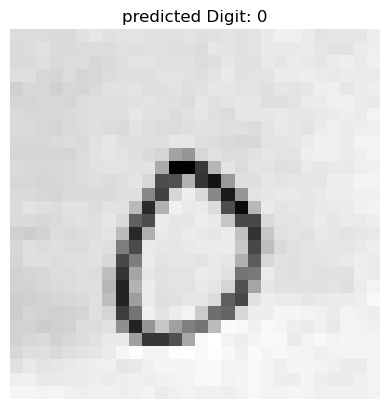

Predicted digit: 0


In [30]:
# Example usage
from PIL import Image
image_path = 'G:\\Deep Learning\\OCR\\c2_0.jpg'
predicted_digit = predict_image(image_path)
print(f'Predicted digit: {predicted_digit}')

1/1 [==============================] - 0s 26ms/step


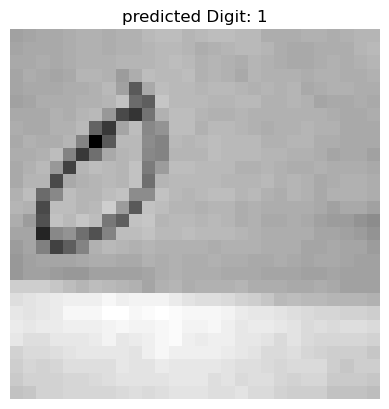

Predicted digit: 1


In [31]:
from PIL import Image
image_path = 'G:\\Deep Learning\\OCR\\c1_0.jpg'
predicted_digit = predict_image(image_path)
print(f'Predicted digit: {predicted_digit}')